In [34]:
import pandas as pd
df = pd.read_csv('C:\\Users\\91863\\Desktop\\ML\\data\\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived', axis = 'columns')
target = df.Survived

In [16]:
inputs.Sex = inputs.Sex.map({'male':1, 'female':2})

In [17]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [18]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [20]:
x_train

,Pclass,Sex,Age,Fare
500,3,1,17.000000,8.6625
12,3,1,20.000000,8.0500
446,2,2,13.000000,19.5000
494,3,1,21.000000,8.0500
585,1,2,18.000000,79.6500
...,...,...,...,...
490,3,1,29.699118,19.9667
97,1,1,23.000000,63.3583
238,2,1,19.000000,10.5000
173,3,1,21.000000,7.9250


In [21]:
x_test

,Pclass,Sex,Age,Fare
631,3,1,51.000000,7.0542
14,3,2,14.000000,7.8542
515,1,1,47.000000,34.0208
65,3,1,29.699118,15.2458
720,2,2,6.000000,33.0000
...,...,...,...,...
584,3,1,29.699118,8.7125
378,3,1,20.000000,4.0125
412,1,2,33.000000,90.0000
405,2,1,34.000000,21.0000


In [22]:
from sklearn import tree

In [23]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
model.score(x_test, y_test)

0.7262569832402235

In [26]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 22],
       [27, 43]], dtype=int64)

Text(33.0, 0.5, 'Truth')

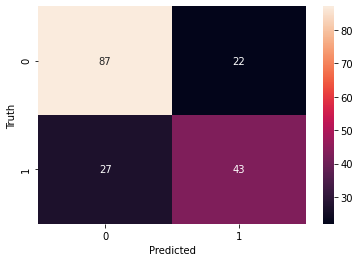

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
import pickle
with open('models\\titanic_model', 'wb') as f:
    pickle.dump(model, f)

In [31]:
with open('models\\titanic_model', 'rb') as f:
    tm = pickle.load(f)

In [32]:
tm.predict([[3,1,51.000000,7.0542]])

array([0], dtype=int64)